In [20]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import os
import json
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
import glob
import os

In [21]:
# I decided to use the Ford GoBike System Dataset provided in the instructions

In [ ]:
# All the files from the dataset were downloaded into a single folder

In [22]:
#First we combine all the csv files into a single dataframe
path = r'C:\Users\brnfr\Documents\Exploratory'

data = glob.glob(os.path.join(path, "*.csv"))

combine = pd.concat((pd.read_csv(i) for i in data), ignore_index = True)

combine.to_csv('master.csv', index = False)

In [23]:
df = pd.read_csv('master.csv')

In [24]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [29]:
# Now we can make a copy of our dataframe
ford = df.copy()

In [30]:
ford.head() # Check that everything is good so far

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [31]:
ford.info() # Get some general information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 292.1+ MB


In [34]:
# Let's first check for some duplicates
ford.duplicated().sum()

0

In [ ]:
# There are no duplicates in our data to begin with

In [32]:
ford.sample(15) # Let's just review a few rows in our data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1518762,1082,2018-10-12 15:26:50.0920,2018-10-12 15:44:52.6860,104.0,4th St at 16th St,37.767045,-122.390833,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,1068,Subscriber,No
688467,864,2018-06-21 10:52:56.8800,2018-06-21 11:07:20.9660,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,81.0,Berry St at 4th St,37.775880,-122.393170,1463,Subscriber,No
322607,85,2018-04-28 20:45:53.6210,2018-04-28 20:47:19.5410,321.0,5th at Folsom,37.780146,-122.403071,47.0,4th St at Harrison St,37.780955,-122.399749,3801,Subscriber,No
2273983,1206,2019-03-27 19:33:52.7850,2019-03-27 19:53:59.4070,91.0,Berry St at King St,37.771762,-122.398438,384.0,Jackson St at Polk St,37.794160,-122.421568,5130,Subscriber,No
2352271,892,2019-03-18 19:37:13.9050,2019-03-18 19:52:06.9010,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,60.0,8th St at Ringold St,37.774520,-122.409449,3742,Subscriber,No
1172139,1064,2018-08-07 10:14:22.4400,2018-08-07 10:32:06.8300,152.0,47th St at San Pablo Ave,37.835632,-122.281051,241.0,Ashby BART Station,37.852477,-122.270213,3426,Customer,No
1837075,283,2018-12-06 18:42:11.2890,2018-12-06 18:46:54.5600,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,10.0,Washington St at Kearny St,37.795393,-122.404770,3371,Subscriber,No
1402300,310,2018-10-31 09:07:01.4190,2018-10-31 09:12:12.3130,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,182.0,19th Street BART Station,37.809013,-122.268247,1283,Subscriber,No
1400070,402,2018-10-31 15:50:50.8010,2018-10-31 15:57:33.7730,231.0,14th St at Filbert St,37.808750,-122.283282,160.0,West Oakland BART Station,37.805318,-122.294837,1007,Subscriber,Yes
63565,1166,2018-01-12 17:56:05.6170,2018-01-12 18:15:32.1140,182.0,19th Street BART Station,37.809013,-122.268247,205.0,Shafter Ave at Cavour St,37.837947,-122.257243,3251,Subscriber,No


In [33]:
ford.describe() # Some basic statistics on our columns in our data

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.734625e+06,2.722124e+06,2.734625e+06,2.734625e+06,2.722124e+06,2.734625e+06,2.734625e+06,2.734625e+06
mean,8.316217e+02,1.258610e+02,3.776825e+01,-1.223510e+02,1.243537e+02,3.776815e+01,-1.223497e+02,2.929797e+03
std,2.232948e+03,1.052229e+02,1.057828e-01,1.684623e-01,1.052322e+02,1.415466e-01,3.483115e-01,1.762695e+03
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.100000e+01
25%,3.460000e+02,3.700000e+01,3.777041e+01,-1.224117e+02,3.300000e+01,3.777106e+01,-1.224113e+02,1.501000e+03
50%,5.500000e+02,9.200000e+01,3.778107e+01,-1.223974e+02,9.000000e+01,3.778107e+01,-1.223971e+02,2.835000e+03
75%,8.610000e+02,1.960000e+02,3.779728e+01,-1.222894e+02,1.960000e+02,3.779728e+01,-1.222902e+02,4.225000e+03
max,8.636600e+04,4.200000e+02,4.551000e+01,0.000000e+00,4.200000e+02,4.551000e+01,0.000000e+00,7.108000e+03


### Cleaning the data

First thing we can see above is that the datatime format needs to be fixed

In [37]:
# Simply converting the time columns to datetime type
ford.start_time = pd.to_datetime(ford.start_time)
ford.end_time = pd.to_datetime(ford.end_time)

In [38]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [39]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 292.1+ MB


User type and bike share columns all only have a few options and thus should be category format rather than object

In [41]:
# Changing columns with only a few options to category rather than object
ford.user_type = ford.user_type.astype('category')
ford.bike_share_for_all_trip = ford.bike_share_for_all_trip.astype('category')

In [42]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  category      
dtypes: category(2), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 255.6+ MB


In [44]:
# While we are at it, all the ids should be objects instead of floats
ford.bike_id = ford.bike_id.astype(str)
ford.start_station_id = ford.start_station_id.astype(str)
ford.end_station_id = ford.end_station_id.astype(str)

In [45]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 255.6+ MB


In [49]:
# Let's create some new columns for date/time in case we want to use them later
# Months
ford['start_time_month'] = ford['start_time'].dt.strftime('%B')
ford['start_time_month_num'] = ford['start_time'].dt.month.astype(int)
ford['end_time_month'] = ford['end_time'].dt.strftime('%B')
ford['end_time_month_num'] = ford['end_time'].dt.month.astype(int)
# Days
ford['start_time_weekday'] = ford['start_time'].dt.strftime('%a')
ford['end_time_weekday'] = ford['end_time'].dt.strftime('%a')
# Hours
ford['start_time_hour'] = ford['start_time'].dt.hour
ford['end_time_hour'] = ford['end_time'].dt.hour
# Finally, lets convert the duration to minutes as that is easier to understand in most cases
ford['duration_min'] = ford['duration_sec']/60
ford['duration_min'] = ford['duration_min'].astype(int)

In [50]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,end_time_month,end_time_month_num,end_time_weekday
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,No,January,1,Wed,22,19,1254,February,2,Thu
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,January,1,Wed,16,15,1423,February,2,Thu
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,No,January,1,Wed,14,10,1192,February,2,Thu
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,No,January,1,Wed,14,7,1017,February,2,Thu
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,No,January,1,Wed,19,6,666,February,2,Thu


In [51]:
ford.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name         12501
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name           12501
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
start_time_month               0
start_time_month_num           0
start_time_weekday             0
start_time_hour                0
end_time_hour                  0
duration_min                   0
end_time_month                 0
end_time_month_num             0
end_time_weekday               0
dtype: int64

In [52]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  start_time_month         object        
 15  start_time_month_num     int32         
 16  start_time_weekday       object        
 17  start_time_hour          in

In [113]:
ford.to_csv(r'C:\Users\brnfr\Documents\Exploratory\ford.csv')

### Data Exploration

Now that the data has been cleaned, we can begin with our data exploration

### Univariate Exploration

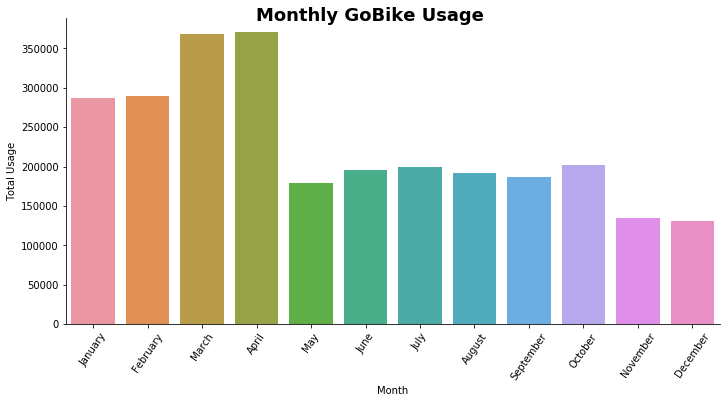

In [62]:
# First lets explore the most popular months to go for a bike ride
month_graph = sns.catplot(data = ford, x = 'start_time_month', kind = 'count', aspect = 2);
month_graph.set_axis_labels('Month', 'Total Usage'),
month_graph.fig.suptitle('Monthly GoBike Usage', y = 1.00, fontsize = 18, fontweight = 'bold');
month_graph.set_xticklabels(rotation=55);

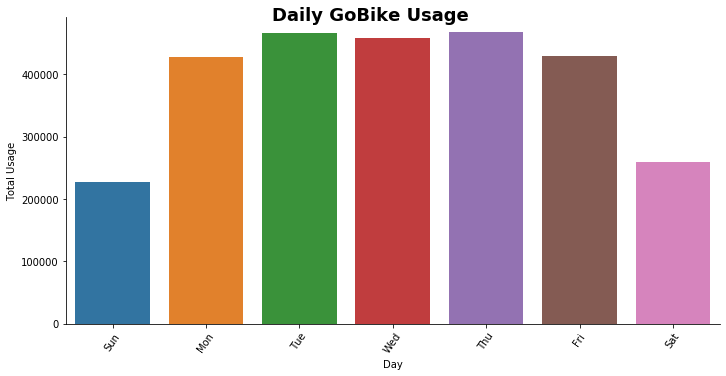

In [67]:
# How about which days are most popular?
order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
day_graph = sns.catplot(data = ford, x = 'start_time_weekday', kind = 'count', aspect = 2, order = order);
day_graph.set_axis_labels('Day', 'Total Usage'),
day_graph.fig.suptitle('Daily GoBike Usage', y = 1.00, fontsize = 18, fontweight = 'bold');
day_graph.set_xticklabels(rotation=55);

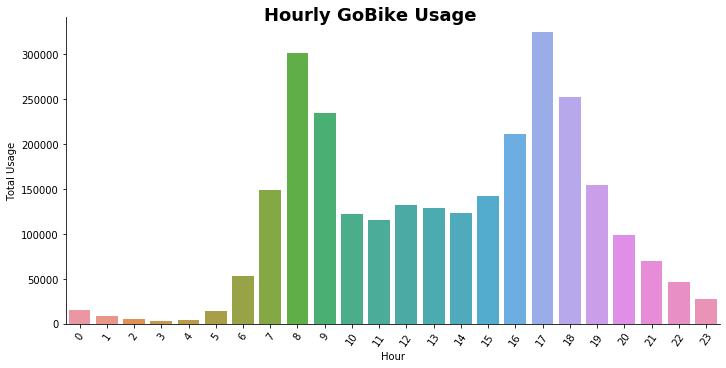

In [70]:
# How about hourly usage?
day_graph = sns.catplot(data = ford, x = 'start_time_hour', kind = 'count', aspect = 2);
day_graph.set_axis_labels('Hour', 'Total Usage'),
day_graph.fig.suptitle('Hourly GoBike Usage', y = 1.00, fontsize = 18, fontweight = 'bold');
day_graph.set_xticklabels(rotation=55);

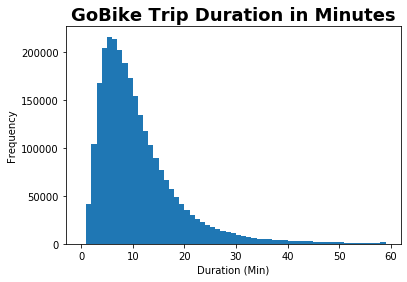

In [75]:
# How long are the bikes typically used for?
bins = np.arange(0, 60, 1)
plt.hist(data = ford, x = 'duration_min', bins = bins);
plt.title("GoBike Trip Duration in Minutes", y=1.00, fontsize=18, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Frequency');

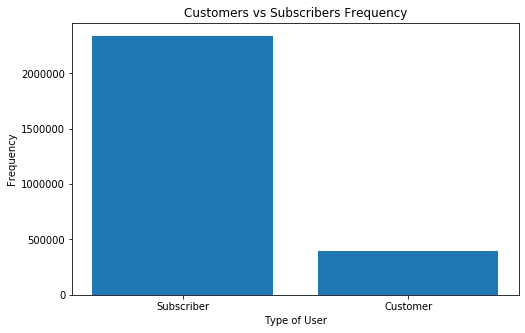

In [76]:
# What does our customer base look like?
plt.figure(figsize=[8,5])
plt.bar(x = ford.user_type.value_counts().keys(), height = ford.user_type.value_counts() )
plt.title('Customers vs Subscribers Frequency')
plt.xlabel('Type of User')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis

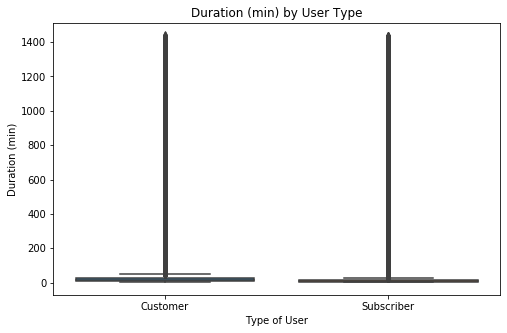

In [79]:
plt.figure(figsize = [8, 5])
sns.boxplot(data = ford, x = 'user_type', y = 'duration_min')
plt.title('Duration (min) by User Type')
plt.xlabel('Type of User')
plt.ylabel('Duration (min)')
plt.show()

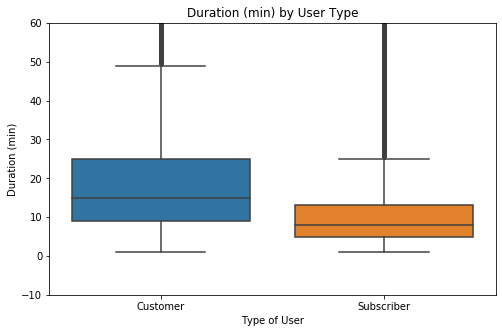

In [81]:
# Due to the widespread values, lets focus on trips 60 minutes or less
plt.figure(figsize = [8, 5])
sns.boxplot(data = ford, x = 'user_type', y = 'duration_min')
plt.ylim([-10, 60])
plt.title('Duration (min) by User Type')
plt.xlabel('Type of User')
plt.ylabel('Duration (min)')
plt.show()

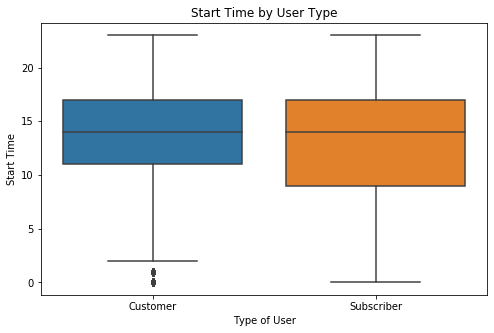

In [84]:
# Hourly Usage for each User Type
plt.figure(figsize = [8, 5])
sns.boxplot(data = ford, x = 'user_type', y = 'start_time_hour')
plt.title('Start Time by User Type')
plt.xlabel('Type of User')
plt.ylabel('Start Time')
plt.show()

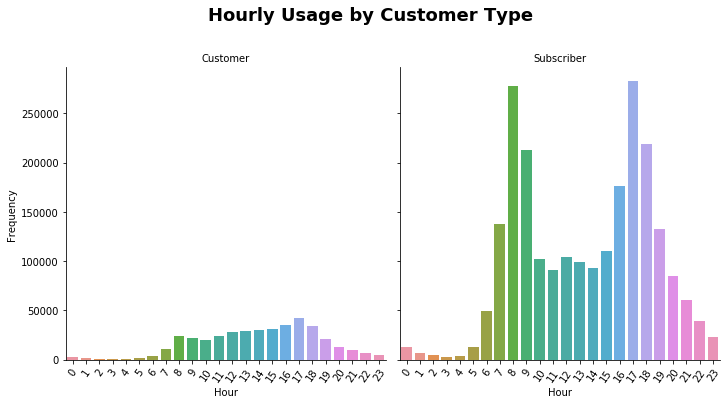

In [91]:
# Hourly Usage by Customer Type
graph = sns.catplot(data=ford, x='start_time_hour', col="user_type", kind='count', sharey = True);
graph.set_axis_labels("Hour", "Frequency");
graph.set_titles("{col_name}");
graph.fig.suptitle('Hourly Usage by Customer Type', y=1.10, fontsize=18, fontweight='bold');
graph.set_xticklabels(rotation=55);

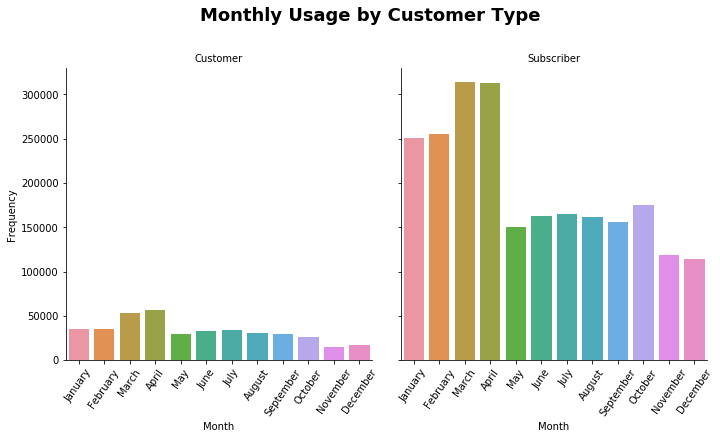

In [89]:
# Monthly Usage by Customer Type
graph = sns.catplot(data=ford, x='start_time_month', col="user_type", kind='count', sharey = True);
graph.set_axis_labels("Month", "Frequency");
graph.set_titles("{col_name}");
graph.fig.suptitle('Monthly Usage by Customer Type', y=1.10, fontsize=18, fontweight='bold');
graph.set_xticklabels(rotation=55);

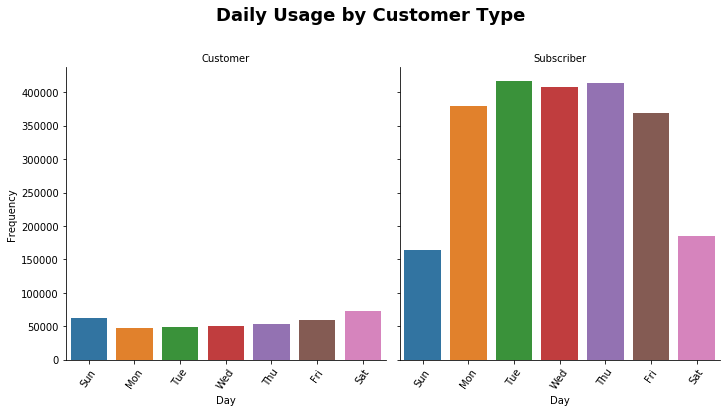

In [90]:
# Daily Usage by Customer Type
graph = sns.catplot(data=ford, x='start_time_weekday', col="user_type", kind='count', sharey = True, order = order);
graph.set_axis_labels("Day", "Frequency");
graph.set_titles("{col_name}");
graph.fig.suptitle('Daily Usage by Customer Type', y=1.10, fontsize=18, fontweight='bold');
graph.set_xticklabels(rotation=55);

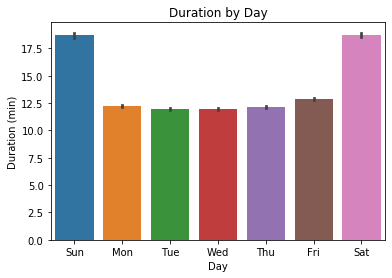

In [98]:
# Lets look at length of usage by day
sns.barplot(data=ford, x='start_time_weekday', y='duration_min', order = order);
plt.title('Duration by Day')
plt.xlabel('Day');
plt.ylabel('Duration (min)');

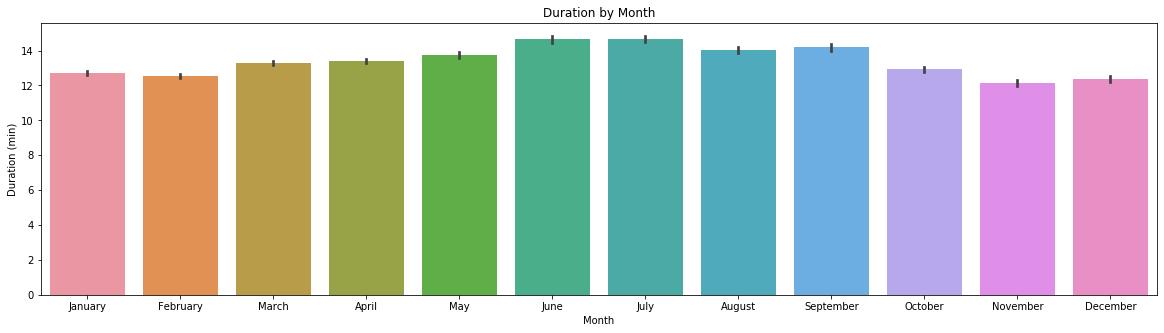

In [106]:
# Lets look at length of usage by month
plt.figure(figsize=(20,5)) # Spread out the data so figure is easier to read
sns.barplot(data=ford, x='start_time_month', y='duration_min');
plt.title('Duration by Month')
plt.xlabel('Month');
plt.ylabel('Duration (min)');

### Multivariate Analysis

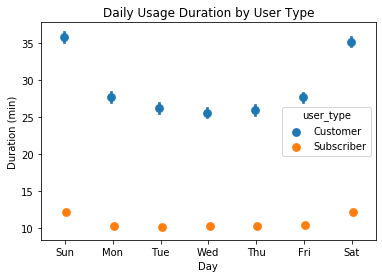

In [102]:
# Daily usage duration by user type
sns.pointplot(data = ford, x='start_time_weekday', y='duration_min', hue='user_type', dodge=True, linestyles="", order = order);
plt.title('Daily Usage Duration by User Type')
plt.xlabel('Day');
plt.ylabel('Duration (min)');

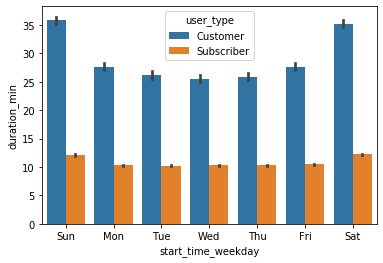

In [104]:
sns.barplot(x='start_time_weekday', y='duration_min', hue='user_type', data = ford, order = order)

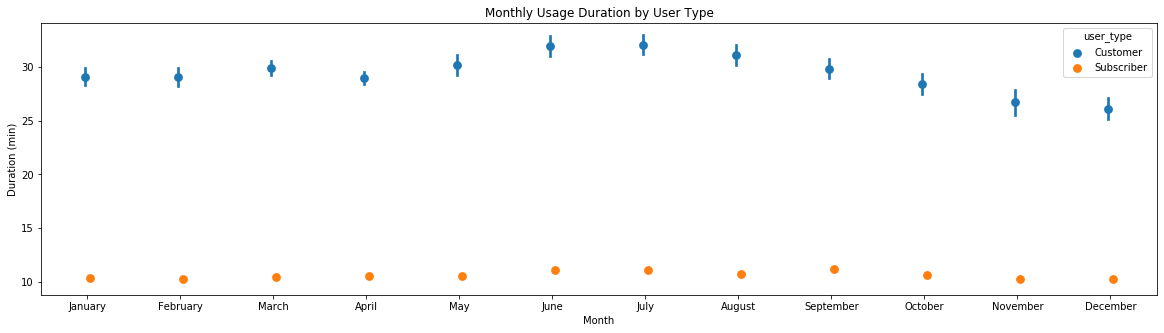

In [110]:
# Monthly usage duration by user type
plt.figure(figsize=(20,5)) # Spread out the data so figure is easier to read
sns.pointplot(data = ford, x='start_time_month', y='duration_min', hue='user_type', dodge=True, linestyles="");
plt.title('Monthly Usage Duration by User Type')
plt.xlabel('Month');
plt.ylabel('Duration (min)');

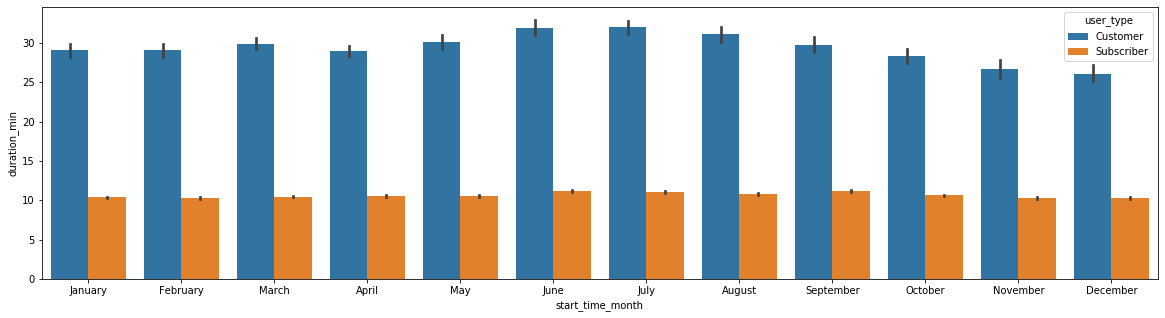

In [109]:
plt.figure(figsize=(20,5)) # Spread out the data so figure is easier to read
sns.barplot(x='start_time_month', y='duration_min', hue='user_type', data = ford)

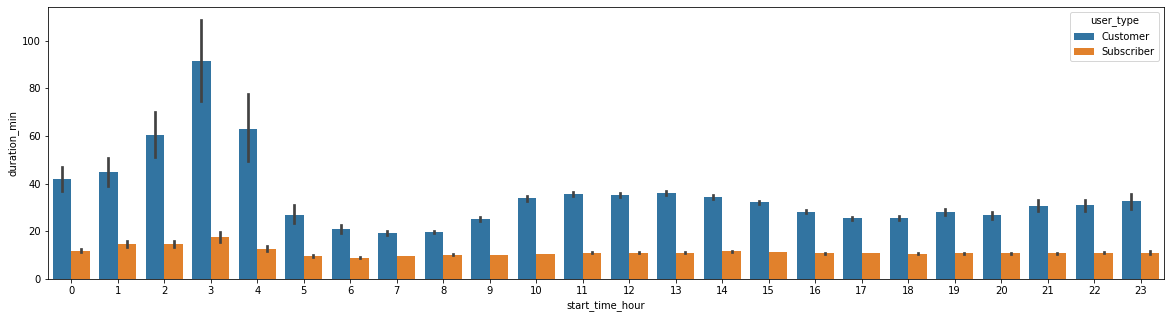

In [111]:
plt.figure(figsize=(20,5)) # Spread out the data so figure is easier to read
sns.barplot(x='start_time_hour', y='duration_min', hue='user_type', data = ford)

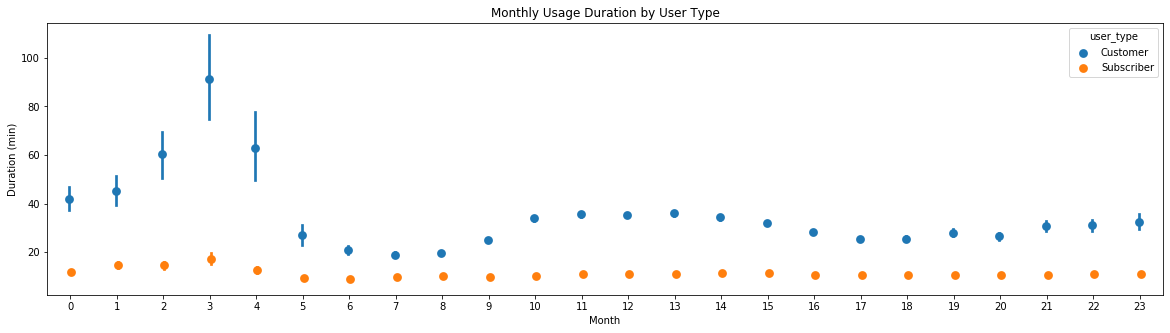

In [112]:
# Monthly usage duration by user type
plt.figure(figsize=(20,5)) # Spread out the data so figure is easier to read
sns.pointplot(data = ford, x='start_time_hour', y='duration_min', hue='user_type', dodge=True, linestyles="");
plt.title('Monthly Usage Duration by User Type')
plt.xlabel('Month');
plt.ylabel('Duration (min)');